In [14]:
import pandas as pd
from geoscripts import gchemplots as gp

In [15]:
# Read in organized data
data = pd.read_csv('processed/data.csv',index_col=0)
print(data.columns)

Index(['SiO2', 'TiO2', 'Al2O3', 'FeO*', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'Ni', 'Cr', 'V', 'Ga', 'Cu', 'Zn', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Ba', 'Th', 'Nb',
       'Y', 'Hf', 'Ta', 'U', 'Pb', 'Rb', 'Cs', 'Sr', 'Sc', 'Zr'],
      dtype='object')


<AxesSubplot: xlabel='$\\mathregular{SiO_2}$ (wt. %)', ylabel='$\\mathregular{Na{_2}O + K{_2}O}$ (wt. %)'>

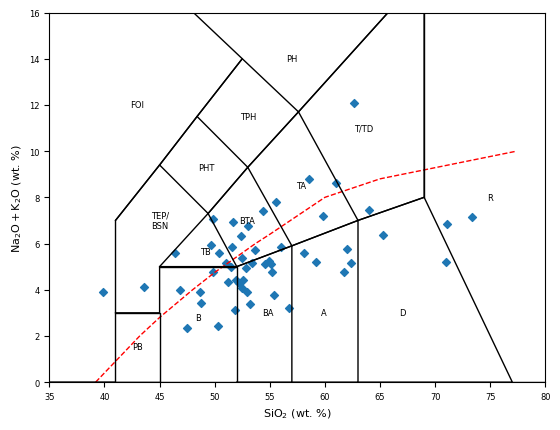

In [21]:
# Plot all samples on TAS
SiO2,Na2O,K2O = data[['SiO2','Na2O','K2O']].T.values

gp.TASsm(SiO2,Na2O,K2O)

C:\Users\dyvas\AppData\Local\Temp\ipykernel_14652\1293252628.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  harker_cols = data.columns.str.replace('*','t')


(<Figure size 1950x2700 with 8 Axes>,
 array([[<AxesSubplot: xlabel='SiO2', ylabel='TiO2'>,
         <AxesSubplot: xlabel='SiO2', ylabel='Al2O3'>],
        [<AxesSubplot: xlabel='SiO2', ylabel='FeOt'>,
         <AxesSubplot: xlabel='SiO2', ylabel='P2O5'>],
        [<AxesSubplot: xlabel='SiO2', ylabel='CaO'>,
         <AxesSubplot: xlabel='SiO2', ylabel='MgO'>],
        [<AxesSubplot: xlabel='SiO2', ylabel='Na2O'>,
         <AxesSubplot: xlabel='SiO2', ylabel='K2O'>]], dtype=object))

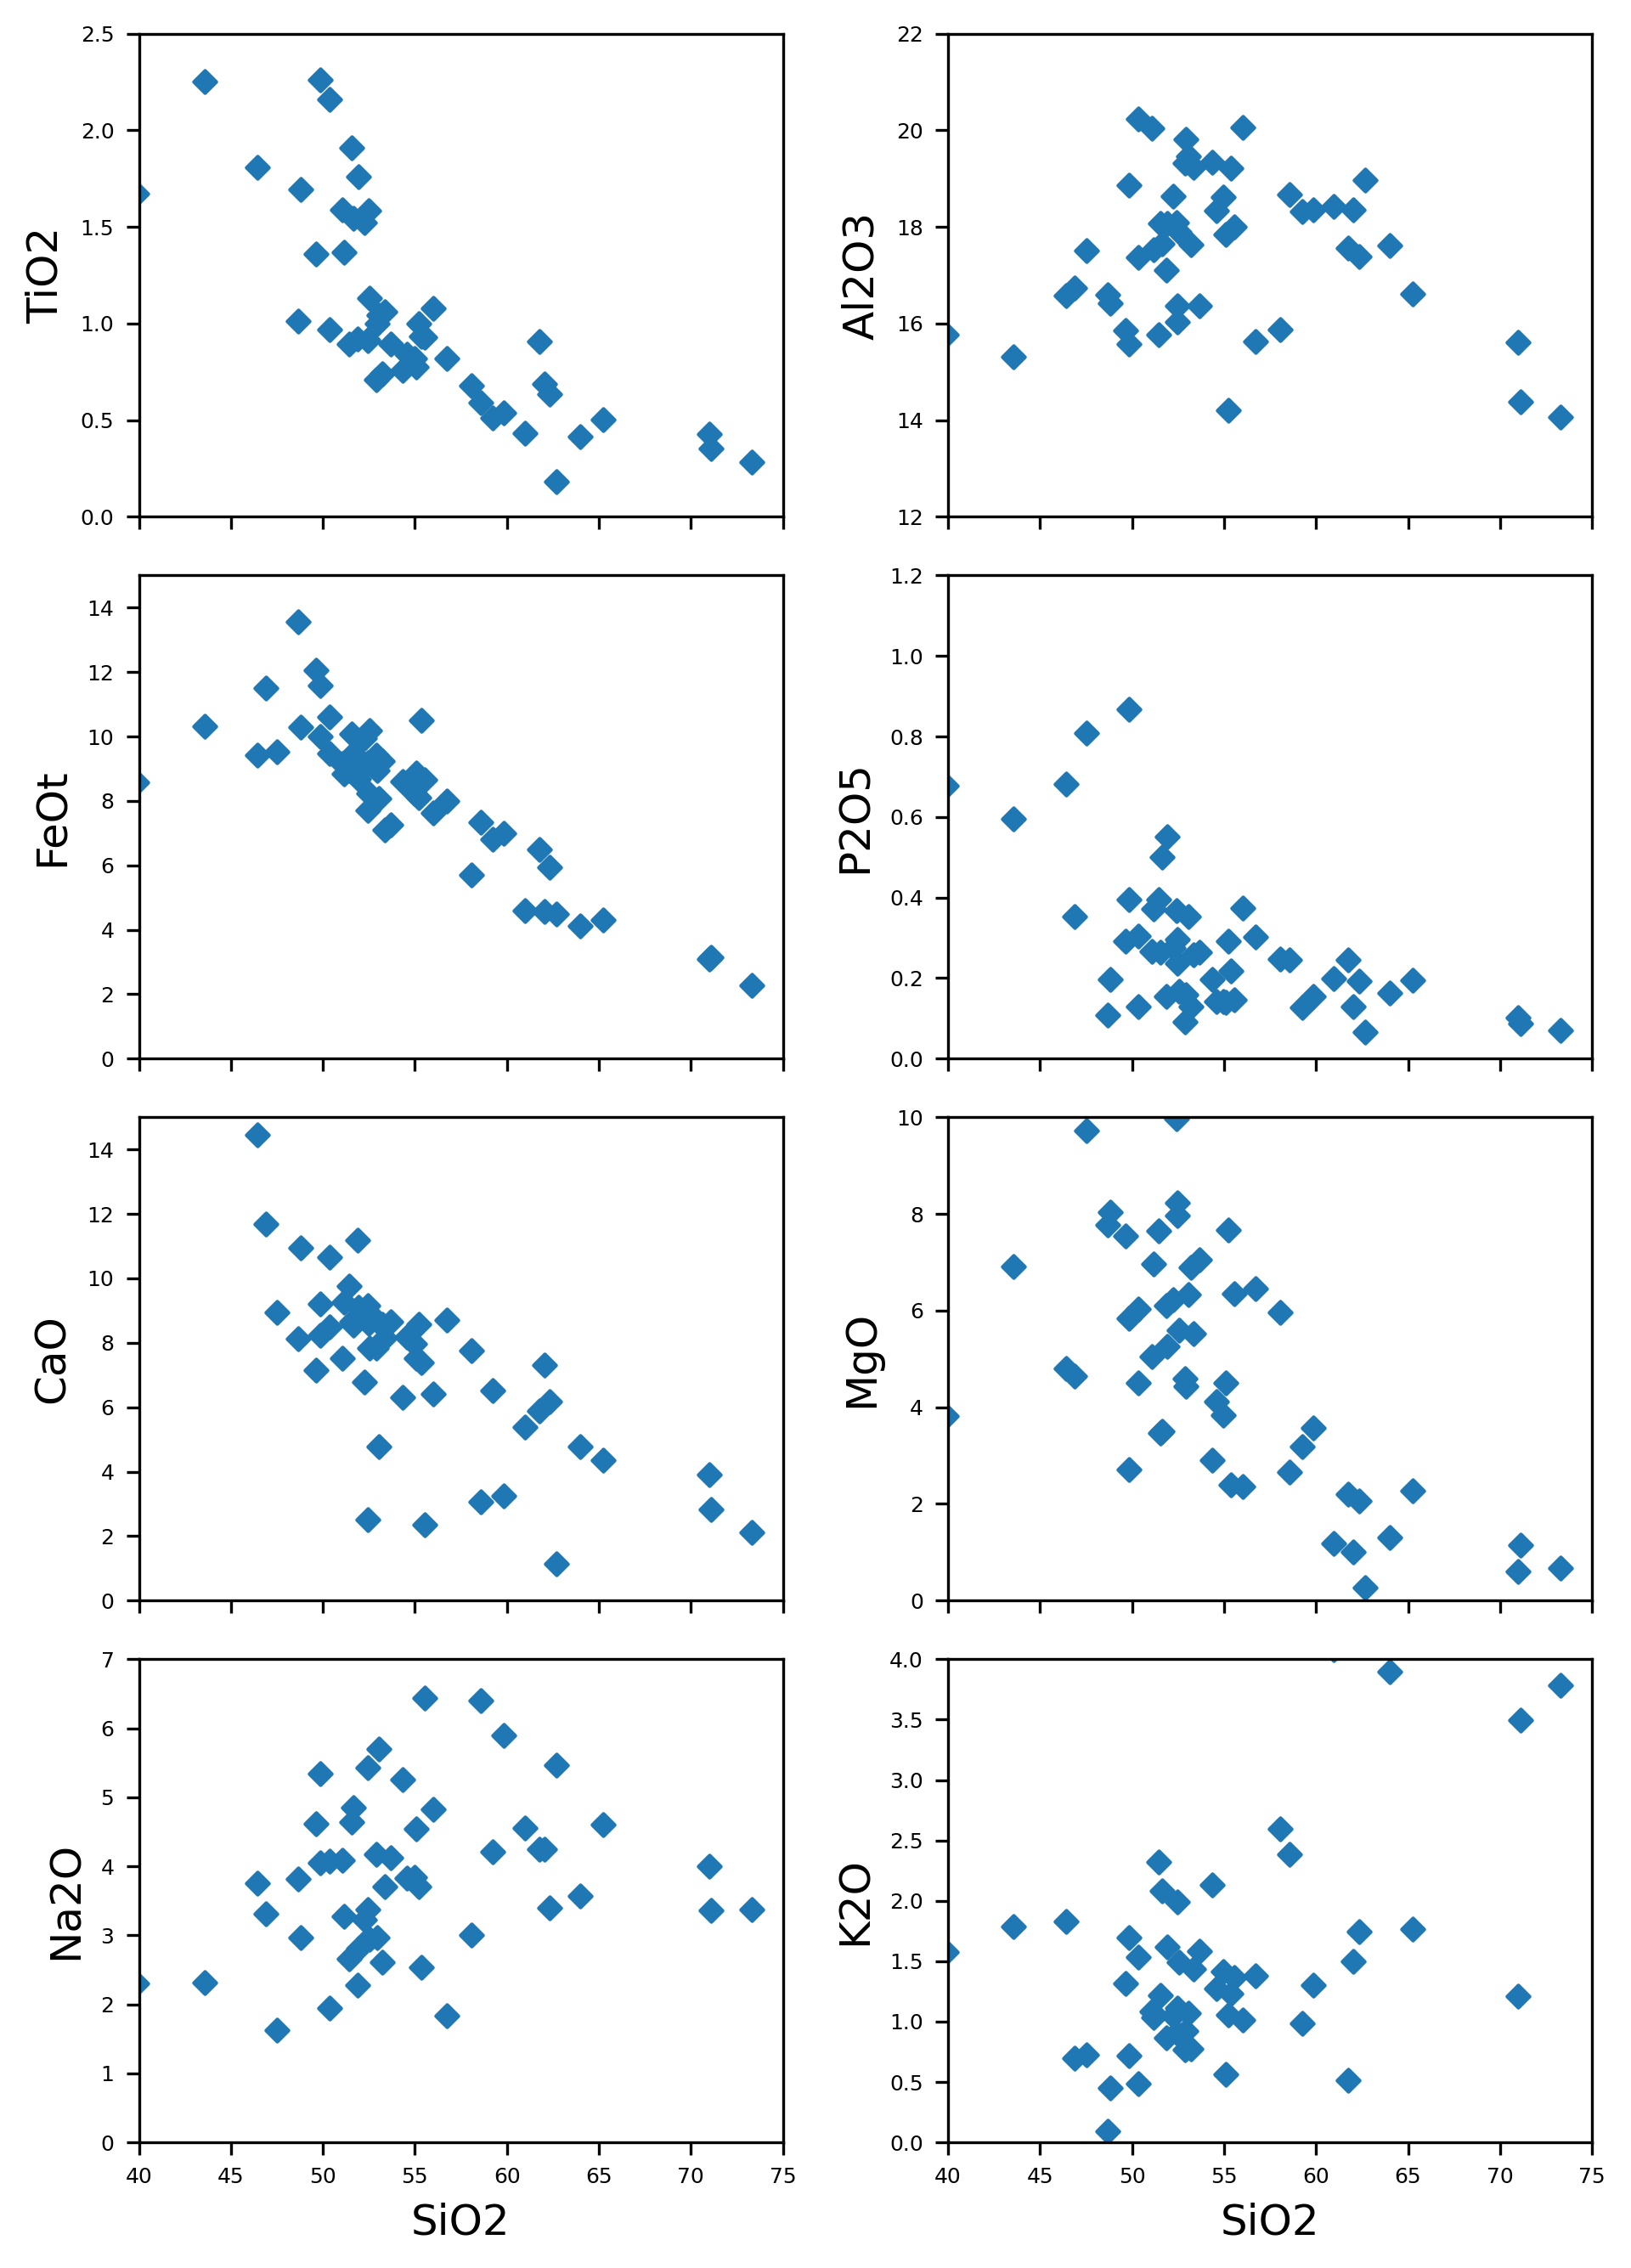

In [20]:
# Plot all samples on harkers

# Rename FeO* for harker
harker_cols = data.columns.str.replace('*','t')
data_harker = data.copy()
data_harker.columns = harker_cols

gp.harker(data_harker)